In [ ]:
环境python 2.7
1.移动平均线moving average 
2.布林带bollinger band 
3.日回报daily returns 
4.累计回报cumulative returns 

In [4]:
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [15]:
df = ts.get_k_data('002233','2015-01-01','2017-01-01')
print df[:3]
df.to_csv('002233.csv',columns=['date','open','close','high','low','volume'])          #保存到本地

         date   open  close   high    low    volume    code
0  2015-01-05  9.552  9.712  9.843  9.458  249837.0  002233
1  2015-01-06  9.609  9.515  9.684  9.421  182603.0  002233
2  2015-01-07  9.421  9.393  9.562  9.308  126189.0  002233


In [16]:
df = pd.read_csv('002233.csv',delimiter=',',usecols=['date','close'],index_col='date',parse_dates=True)

In [17]:
def compute_ma(df,window):
    return df.rolling(window).mean()     #计算滑动窗口的移动平均收盘价格

def compute_mstd(df,window):
    return df.rolling(window).std()       #计算滑动窗口的移动标准差

def compute_bband(rm, rstd):              #布林带
    upper = rm + 2*rstd
    lowwer = rm - 2*rstd
    return upper,lowwer


def plot_data(df,title):
    ax = df['close'].plot(title=title)
    ax.set_xlabel('date')
    ax.set_ylabel('price')
    ax.legend(loc='upper left')
    plt.show()

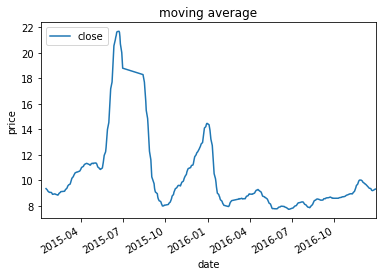

In [18]:
#10日移动平均线
rm = compute_ma(df,10)
plot_data(rm,'moving average',)

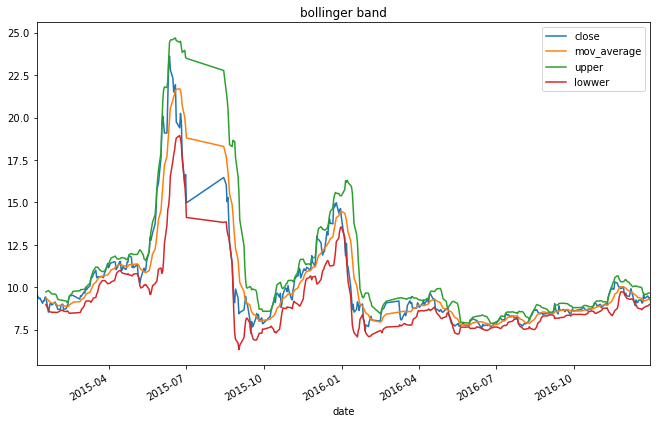

In [19]:
#布林带
rstd = compute_mstd(df,10)
upper, lowwer = compute_bband(rm, rstd)
ax = df.plot(title='bollinger band',figsize=(11,7))
rm.plot(ax=ax)
upper.plot(ax=ax)
lowwer.plot(ax=ax)
ax.set_xlabel=('date')
ax.set_ylabel=('price')
ax.legend(['%s' %s for s in ['close','mov_average','upper','lowwer']])
plt.show()

In [20]:
def compute_dr(df):                                       # 日回报
    daily_return = df.copy()
    daily_return[1:] = (df[1:]/df[:-1].values) -1         # 两个DateFrame对象进行运算是,会尽量根据index对每一行元素进行匹配
    daily_return.iloc[0,:]=0                              # 如果不使用values属性,前面的切片操作可能不起作用
    return daily_return                                   

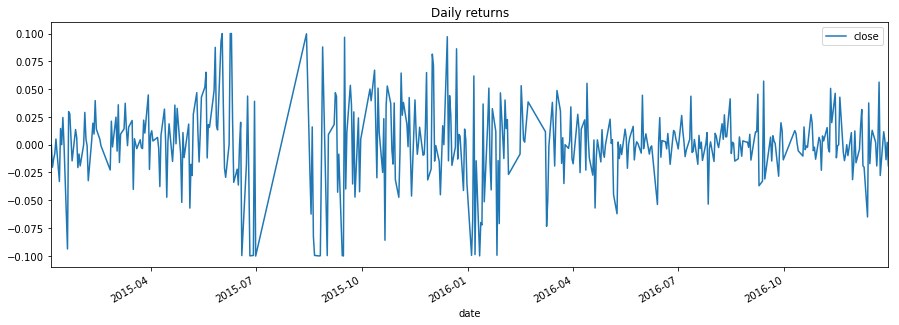

In [21]:
daily_return = compute_dr(df)
daily_return.plot(title='Daily returns',figsize=(15,5))
plt.show()

In [30]:
#累计回报
def compute_cr(df):
    cumulative_returns= df.copy()
                              # 2015-1-1的收盘价格
    cumulative_returns = (df/df.iloc[0].values)-1
    return cumulative_returns

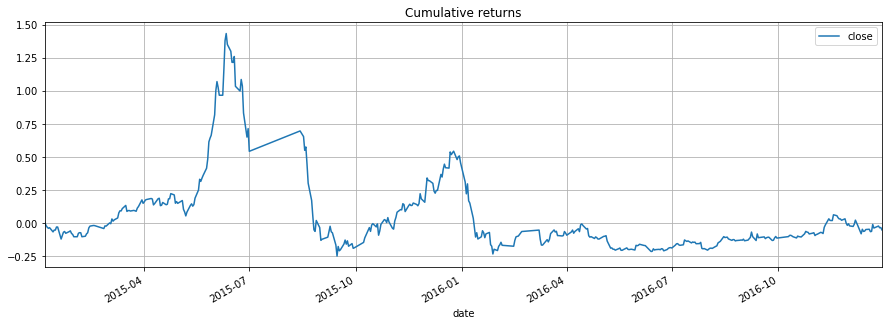

In [33]:
cumulative_returns = compute_cr(df)
cumulative_returns.plot(title='Cumulative returns',figsize=(15,5))
plt.grid()
plt.show()
